### Python module/package imports for this chapter

In [1]:
import sys, os, math, random, functools

import numpy as np

import matplotlib
import matplotlib.pyplot as pp
import matplotlib.animation as anim

%matplotlib inline

from IPython.display import display, HTML

### Code from previous videos (enhanced)

In [2]:
from turtle import Turtle, Terrarium

## Exploiting class inheritance in Python

In [3]:
def polyspi(t,side,angle):
    if side:
        t.forward(side)
        t.right(angle)
        polyspi(t,side-2,angle)

In [4]:
with Terrarium(animate=True) as t:
    t1 = Turtle(t,'coral')

    t1.point(1)
    polyspi(t1,100,119)

In [5]:
with Terrarium(animate=True) as t:
    t1 = Turtle(t,'navy')

    t1.point(1)
    polyspi(t1,60,65)

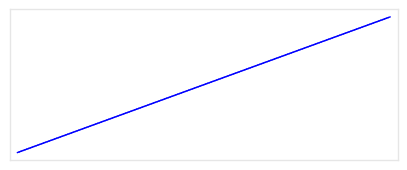

In [6]:
with Terrarium() as t:
    t1 = Turtle(t)
    
    t1.left(20)
    for i in range(200):
        t1.forward(1)

In [7]:
class ShakyTurtle(Turtle):
    def forward(self,distance):
        self.right(random.uniform(-10,10))
        super().forward(random.uniform(0.75,1.25)*distance)

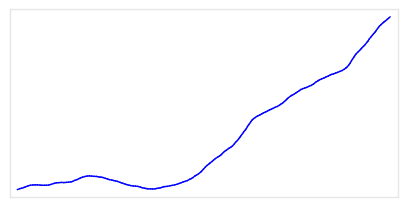

In [8]:
with Terrarium() as t:
    t1 = ShakyTurtle(t)
    
    t1.left(20)
    for i in range(200):
        t1.forward(1)

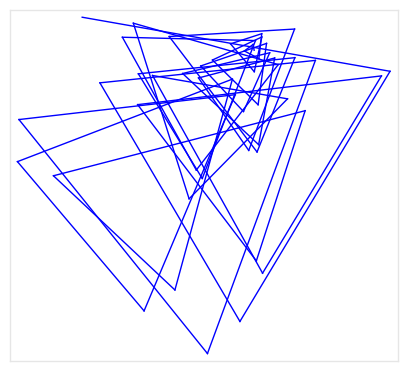

In [9]:
with Terrarium() as t:
    t1 = ShakyTurtle(t)
    
    polyspi(t1,100,119)

In [11]:
class ShakyTurtle(Turtle):
    def __init__(self,t,col='b',shakiness=10):
        super().__init__(t,col)
        self.shakiness = shakiness
    
    def forward(self,distance):
        self.right(random.uniform(-1,1)*self.shakiness)
        super().forward(random.uniform(0.75,1.25)*distance)

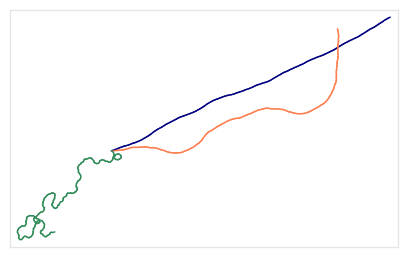

In [12]:
with Terrarium() as t:
    t1 = ShakyTurtle(t,'navy',5)
    t2 = ShakyTurtle(t,'coral',10)
    t3 = ShakyTurtle(t,'seagreen',50)
    
    t1.left(20)
    for i in range(200):
        for ti in [t1,t2,t3]:
            ti.forward(1)

In [13]:
class PredatorTurtle(ShakyTurtle):
    def follow(self,prey,distance):
        dx, dy = prey.pos[0] - self.pos[0], prey.pos[1] - self.pos[1]
        angle_to_prey = math.atan2(dy,dx) / self.deg - self.angle
        
        self.left(angle_to_prey)
        super().forward(distance)

In [14]:
with Terrarium(animate=True) as t:
    t1 = ShakyTurtle(t,'navy',20)
    t2 = PredatorTurtle(t,'coral',10)
    
    for i in range(200):
        t1.forward(1)
        t2.follow(t1,0.75)
        
    t1.point(); t2.point()

In [15]:
def move(turtle,pos):
    turtle.pos = pos
    
Turtle.move = move

In [16]:
with Terrarium(animate=True) as t:
    t1 = ShakyTurtle(t,'navy',20)
    t2 = PredatorTurtle(t,'coral',10)
    
    t1.move((75,75))
    
    for i in range(200):
        t1.forward(1)
        t2.follow(t1,0.75)
        
    t1.point(); t2.point()